In [1]:
#Soham Shewale

#Importing the data from Excel
import pandas as pd
import numpy as np
df = pd.read_csv('Activision Blizzard Stock prices.csv')

#Dropping Irrelevant Columns
df.drop('Open', inplace=True, axis=1)
df.drop('High', inplace=True, axis=1)
df.drop('Low', inplace=True, axis=1)
df.drop('Close', inplace=True, axis=1)
df.drop('Volume', inplace=True, axis=1)
df

#Creating Binary Var for COD release dates
#Release dates
#COD4: Nov 5 2007 y
#COD5: Nov 11 2008 y
#CODMW2: Nov 10 2009 y
#CODBO: Nov 9 2010 y
#CODMW3: Nov 8 2011 y
#CODBO2: Nov 12 2012 y
#CODG: Nov 5 2013 y 
#CODAW: Nov 4 2014 y
#CODBO3: Nov 6 2015 y
#CODIW: Nov 4 2016 y 
#CODWW2: Nov 3 2017 y
#CODBO4: Oct 12 2018 y 
#CODMW: Oct 25 2019 y
#CODW: March 10 2020 y 
#CODCW: Nov 13 2020 y
df['COD_release'] = df.Date.map({'2007-11-05':1,'2008-11-10':1,'2009-11-09':1,'2010-11-08':1,'2011-11-07':1,'2012-11-12':1,
                                 '2013-11-04':1,'2014-11-03':1,'2015-11-02':1,'2016-10-31':1,'2017-10-30':1,'2018-10-08':1,
                                 '2019-10-21':1,'2020-03-09':1,'2020-11-09':1})
df['COD_release'].fillna(value='0',inplace=True)

# Creating the counting variable
count = 0 
benchmark = 0 
for i, row in df.iterrows():
    if row.COD_release == 1:
        count = 0
        benchmark = row['Adj Close']
    else: 
        count += 1
    df.at[i, 'Weeks_after_COD'] = count
    df.at[i, 'Price_Subtracted'] =  row['Adj Close'] - benchmark
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Date,Adj Close,COD_release,Weeks_after_COD,Price_Subtracted
0,2007-11-05,9.235038,1,0.0,0.000000
1,2007-11-12,8.994237,0,1.0,-0.240801
2,2007-11-19,8.691011,0,2.0,-0.544027
3,2007-11-26,9.877166,0,3.0,0.642128
4,2007-12-03,11.946239,0,4.0,2.711201
5,2007-12-10,11.915026,0,5.0,2.679988
6,2007-12-17,12.829164,0,6.0,3.594126
7,2007-12-24,13.052126,0,7.0,3.817088
8,2007-12-31,12.414457,0,8.0,3.179419
9,2008-01-07,12.102314,0,9.0,2.867276


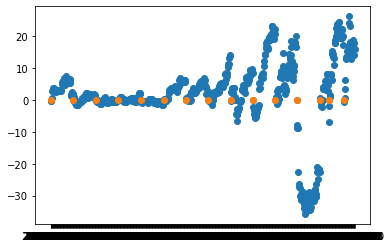

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = df['Date']
y = df['Price_Subtracted']
x1 = df['Date'][df['COD_release'] == 1]
y1 = y[df['COD_release'] == 1]

plt.figure()
plt.scatter(x, y)
plt.scatter(x1, y1)

In [29]:
import sys
!{sys.executable} -m pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df['Adj Close'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())


  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2704.493, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2718.169, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2719.787, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2719.725, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2719.792, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2704.343, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2718.692, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2704.772, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2706.241, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2704.513, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2706.264, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2706.606, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2706.094, Time=0.13 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]

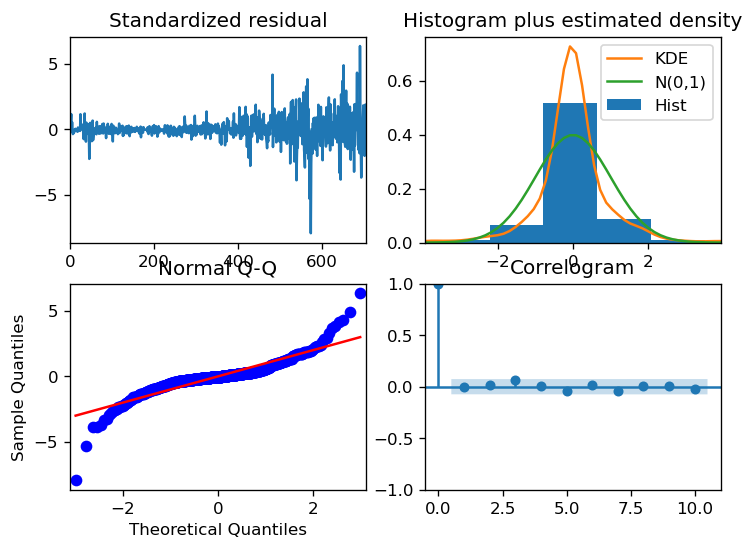

In [30]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

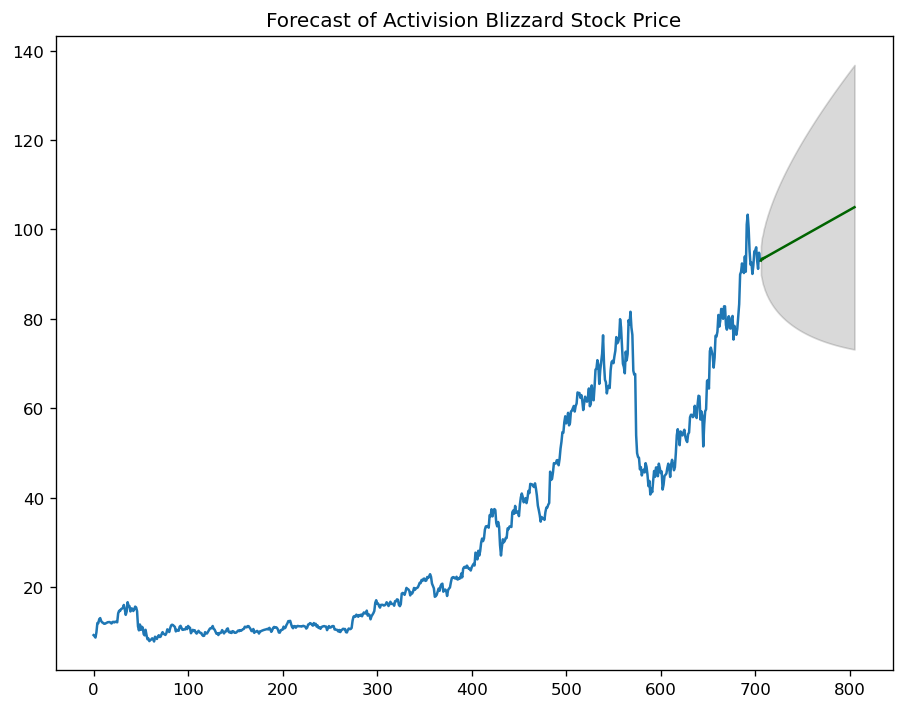

In [38]:
n_periods = 100
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Adj Close']), len(df['Adj Close'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df['Adj Close'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast of Activision Blizzard Stock Price")
plt.show()